In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [8]:
def ShiTomasi(file_name,corner):
    img = cv.imread(file_name)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray,corner,0.01,10)
    corners = np.int0(corners)
    for i in corners:
        x,y = i.ravel()
        cv.circle(img,(x,y),3,255,-1)
    cv.putText(img,"Using ShiTomasi",(10, 25),cv.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
    plt.imshow(img)
    plt.show()

In [9]:
def showImage(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [10]:
def CornerHarris(file_name):
    img = cv.imread(file_name)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst,None)
    h,w=img.shape[1::-1]
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,0,255]
    cv.putText(img,"Using Harris",(10, 25),cv.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
    showImage(img)

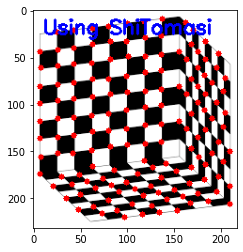

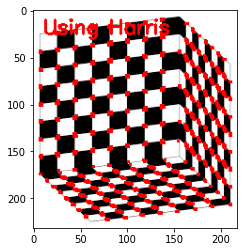

In [11]:
#ảnh 1
file_name="3D_axis.png"
ShiTomasi(file_name,150)
CornerHarris(file_name)

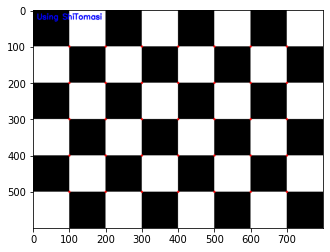

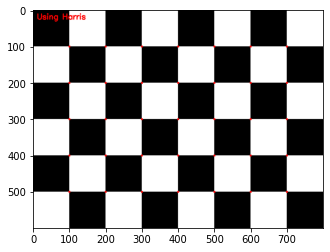

In [12]:
#ảnh 2
file_name="chess.png"
ShiTomasi(file_name,150)
CornerHarris(file_name)

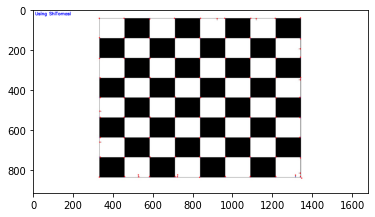

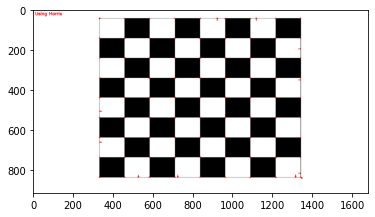

In [13]:
#ảnh 3
file_name="chess.jpg"
ShiTomasi(file_name,150)
CornerHarris(file_name)

# Nhận xét 2 thuật toán qua thực nghiệm và lý thuyết:

Harris corner detection:
Ưu điểm:
- Phát hiện tốt sự thay đổi nhanh chóng về góc
- Ít bị ảnh hưởng bởi màu sắc mà chú trọng về  các góc corner
Khuyết điểm:
- Những góc quá lớn hoặc quá nhỏ hoặc hình bị hơi mờ làm cho góc bị tròn đầu không nhận diện được
- Có trường hợp đánh dấu 1 góc nhiều lần( thuật toán chưa hiệu quả)

Shi Tomasi corner dectection:
Ưu điểm:
- Phát hiện tốt hơn những sự thay đổi về góc và nhạy hơn về màu sắc nên khi có sự thay đổi nhỏ về màu cũng có thể nhận diện ra
- Có thể điều chỉnh số lượng điểm muốn đánh dấu (chọn N điểm tốt nhất trong hình)
Khuyết điểm:
- Do quá nhạy về màu sắc nên đôi khi có những chỗ không có góc nhưng có sự thay đổi về màu sắc vẫn được đánh dấu
- Với các hình có quá nhiều điểm thì việc giới hạn số điểm sẽ là bất lợi (còn hình quá ít điểm cũng là bất lợi)